This document outlines how we will style our plots to maintain a consistent and professional appearance across all projects. It introduces our standard color palette, annotations, titles, subtitles, and credit lines—each contributing to a unified visual identity. The first section demonstrates how the general stylesheet enhances basic plots, followed by examples of additional styling techniques that further refine the presentation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.ticker as mticker
from pypalettes import load_cmap
from highlight_text import ax_text
from drawarrow import ax_arrow
from cycler import cycler

# sets the float format for pandas to display numbers without decimal places
pd.set_option('display.float_format', '{:,.0f}'.format)

# Generating Fake Data

In [2]:
# Random seed for consistency
np.random.seed(42)

n_orgs = 15
org_names = [f"Community Shelter {i+1}" for i in range(n_orgs)]

service_types = ["Emergency Shelter", "Food Bank", "Outreach", "Transitional Housing", "Day Center"]
funding_sources = ["Government", "Private", "Mixed"]
populations_served = ["Families", "Single Adults", "Youth", "Veterans", "Mixed"]

# Create dataset
df = pd.DataFrame({
    "Organization": org_names,
    "City": np.random.choice(["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Miami"], n_orgs),
    "Annual_Budget_USD": np.random.randint(200_000, 5_000_000, n_orgs),
    "Meals_Served": np.random.randint(5_000, 500_000, n_orgs),
    "Beds_Available": np.random.randint(25, 500, n_orgs),
    "Staff_Count": np.random.randint(5, 200, n_orgs),
    "Volunteers": np.random.randint(10, 1000, n_orgs),
    "Year_Founded": np.random.randint(1970, 2022, n_orgs),
    "Service_Type": np.random.choice(service_types, n_orgs),
    "Funding_Source": np.random.choice(funding_sources, n_orgs),
    "Primary_Population": np.random.choice(populations_served, n_orgs)
})

df


,Organization,City,Annual_Budget_USD,Meals_Served,Beds_Available,Staff_Count,Volunteers,Year_Founded,Service_Type,Funding_Source,Primary_Population
0,Community Shelter 1,Houston,1966891,89654,298,176,486,2009,Emergency Shelter,Mixed,Youth
1,Community Shelter 2,Phoenix,4721373,433989,412,12,712,1990,Emergency Shelter,Government,Families
2,Community Shelter 3,Chicago,3544769,386490,113,179,411,1985,Emergency Shelter,Private,Mixed
3,Community Shelter 4,Phoenix,991743,72435,340,39,739,2014,Transitional Housing,Government,Single Adults
4,Community Shelter 5,Phoenix,303355,324030,38,85,565,1987,Outreach,Mixed,Youth
5,Community Shelter 6,Los Angeles,1462752,333947,266,168,171,2016,Outreach,Mixed,Families
6,Community Shelter 7,Chicago,1596025,36551,289,54,211,1993,Emergency Shelter,Private,Single Adults
7,Community Shelter 8,Chicago,1507371,383360,370,108,967,1995,Outreach,Government,Single Adults
8,Community Shelter 9,Chicago,1117040,278538,77,136,279,1994,Outreach,Mixed,Veterans
9,Community Shelter 10,Phoenix,2453882,336236,410,6,872,2014,Emergency Shelter,Private,Mixed


# Basic Plot without style 

Here is the generic plot generated from matplotlib with not custom colors or styles.
Below is the style sheet which we will use to make all our plot consistint

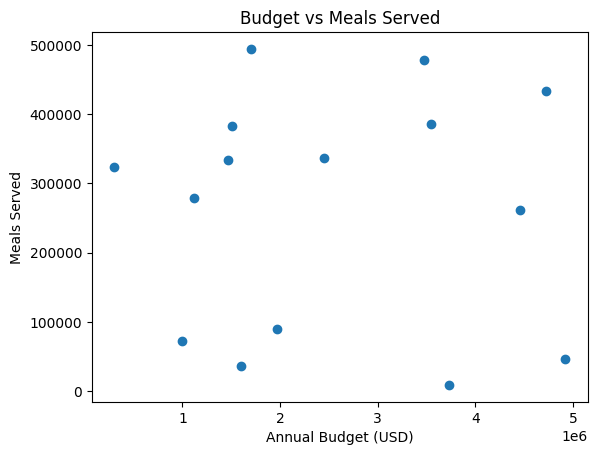

In [3]:
plt.scatter(df["Annual_Budget_USD"], df["Meals_Served"])
plt.xlabel("Annual Budget (USD)")
plt.ylabel("Meals Served")
plt.title("Budget vs Meals Served")
plt.show()

# style settings

In [4]:
# Define your custom colors
colors = ['#FEBE10', '#1D1E9E', '#AD0000', '#000000', '#FFFFFF']

plt.rcParams.update({
    # Colors
    'axes.prop_cycle': cycler('color', colors),

    # Background
    'figure.facecolor': 'lightgrey',
    'axes.facecolor': 'lightgrey',
    'savefig.facecolor': 'lightgrey',

    # Grid
    'axes.grid': True,
    'grid.color': '#000000',
    'grid.alpha': 0.1,
    'grid.linestyle': '--',

    # Lines & markers
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'lines.markeredgewidth': 0.5,

    # Axes & ticks
    'axes.edgecolor': '#000000',
    'axes.labelcolor': '#000000',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,

    # Legend
    'legend.frameon': False,
    'legend.fontsize': 10,
    'legend.loc': 'best',

    # Font
    'font.family': 'DejaVu Sans',
    'text.color': '#000000',

    # Savefig
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
})


## function for formatting numbers

In [5]:
# Create the formatter once
formatter = mticker.StrMethodFormatter("{x:,.0f}")

def apply_formatter(ax=None):
    """Automatically format numeric axes with commas, leave text/categorical axes alone."""
    if ax is None:
        ax = plt.gca()
    
    # Format x-axis only if tick labels are numbers
    x_labels = [lbl.get_text() for lbl in ax.get_xticklabels()]
    if all(_is_number(lbl) for lbl in x_labels):
        ax.xaxis.set_major_formatter(formatter)
    
    # Format y-axis only if tick labels are numbers
    y_labels = [lbl.get_text() for lbl in ax.get_yticklabels()]
    if all(_is_number(lbl) for lbl in y_labels):
        ax.yaxis.set_major_formatter(formatter)

def _is_number(s):
    """Helper to check if string can be converted to float."""
    try:
        float(s.replace(',', ''))  # remove commas if already formatted
        return True
    except ValueError:
        return False

# Example plot with style settings added. 

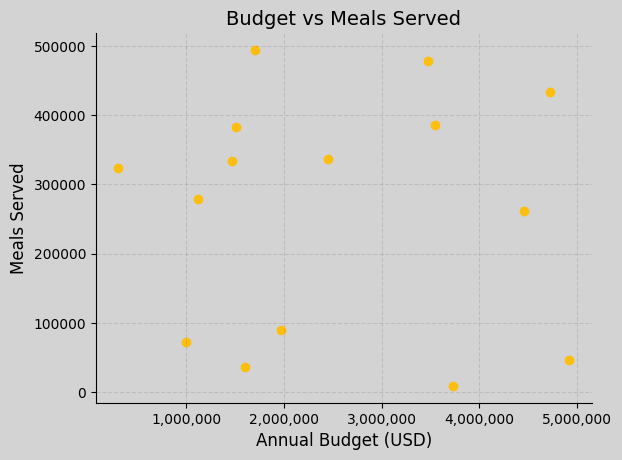

In [6]:
# Example plot
plt.scatter(df["Annual_Budget_USD"], df["Meals_Served"])
plt.xlabel("Annual Budget (USD)")
plt.ylabel("Meals Served")
plt.title("Budget vs Meals Served")

apply_formatter()
plt.show()

# Example Plot 
- Proper title 
- sub heading 
- annotations 
- credit lines


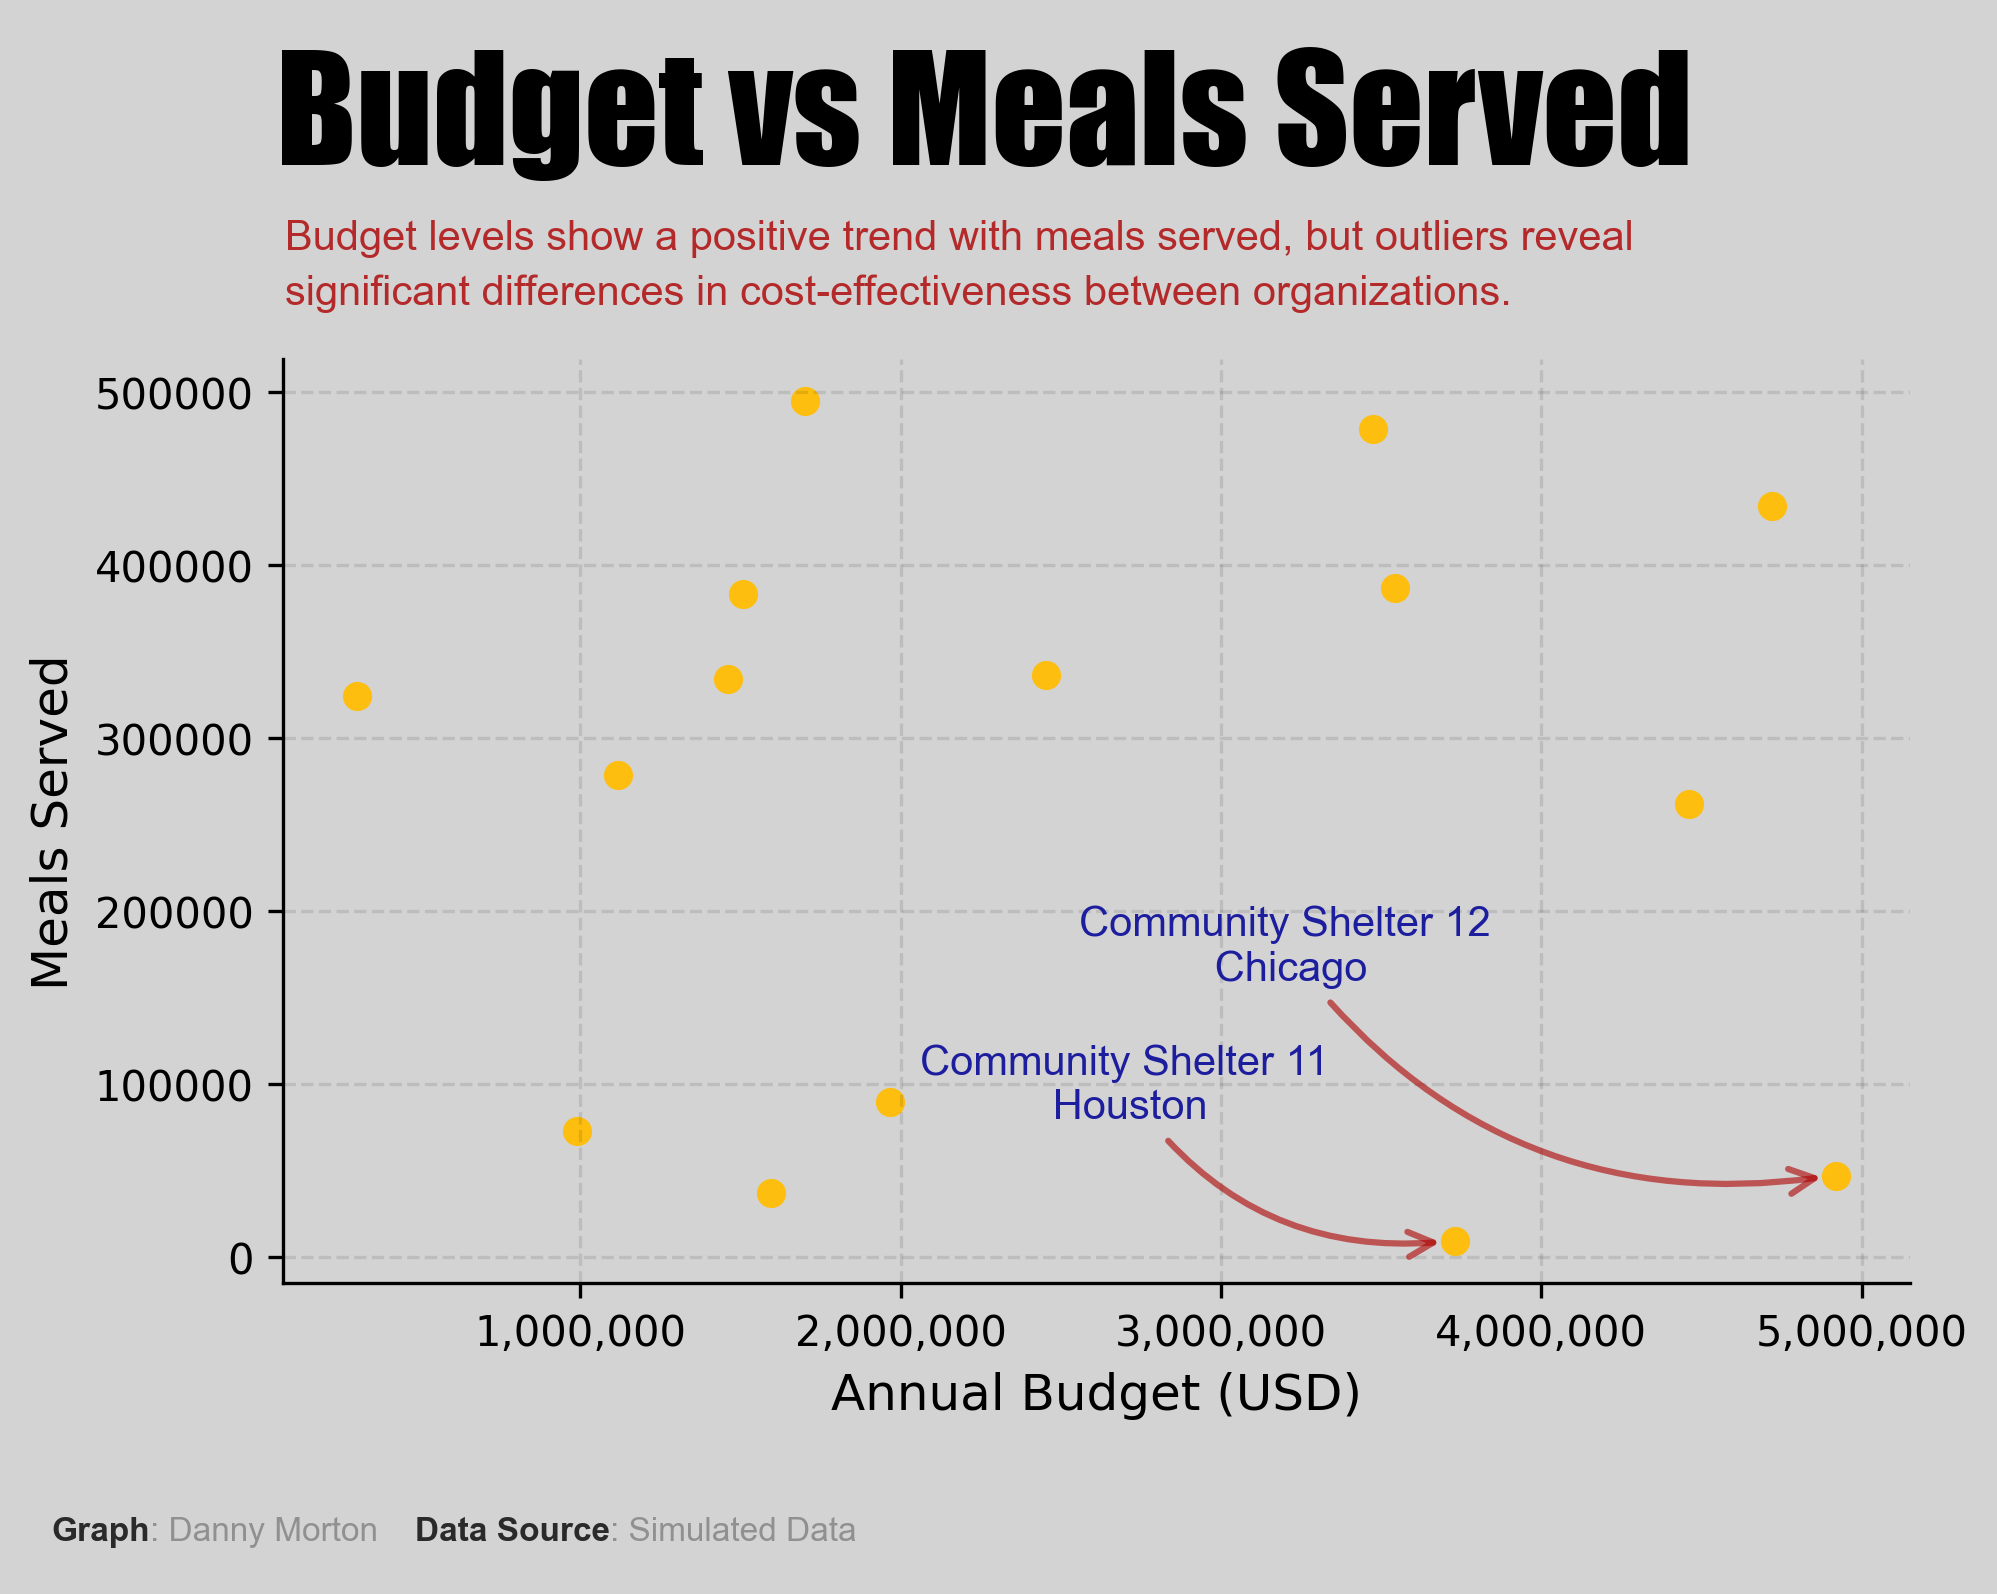

In [7]:
# Example plot

#set figure size and dpi
plt.figure(figsize=(7, 4), dpi=300)
ax = plt.gca()
#plot type
plt.scatter(df["Annual_Budget_USD"], df["Meals_Served"], )

#labels
plt.xlabel("Annual Budget (USD)")
plt.ylabel("Meals Served")

#title (added space for larger figure)
s = "Budget vs Meals Served"
ax_text(x=50000, y=700000, s=s, fontfamily='impact', size=35, ha="left")

# Additional subtitle
s = "Budget levels show a positive trend with meals served, but outliers reveal\n" \
"significant differences in cost-effectiveness between organizations."
ax_text(x=80000, y=600000, s=s, fontfamily='arial', size=10, ha="left", color="#AD0000", alpha=0.8)

# Annotation arrow
ax.annotate(
    "Community Shelter 12\n Chicago",
    xy=(4900339, 46606),
    xytext=(3200000, 160000),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    # alpha=0.8,
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)


# Annotation arrow
ax.annotate(
    "Community Shelter 11\n Houston",
    xy=(3710409, 8890),
    xytext=(2700000, 80000),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    # alpha=0.8,
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

# Caption
s = "<Graph>: Danny Morton    <Data Source>: Simulated Data"
ax_text(
    x=-650000,
    y=-150000,
    s=s,
    fontfamily='Arial',
    size=8,
    color='grey',
    ha="left",
    alpha=0.8,
    highlight_textprops=[
        {"weight": "bold", "color": "black"},
        {"weight": "bold", "color": "black"}
    ]
)

#function to format axes from 1000 to 1,000...
apply_formatter()

plt.show()

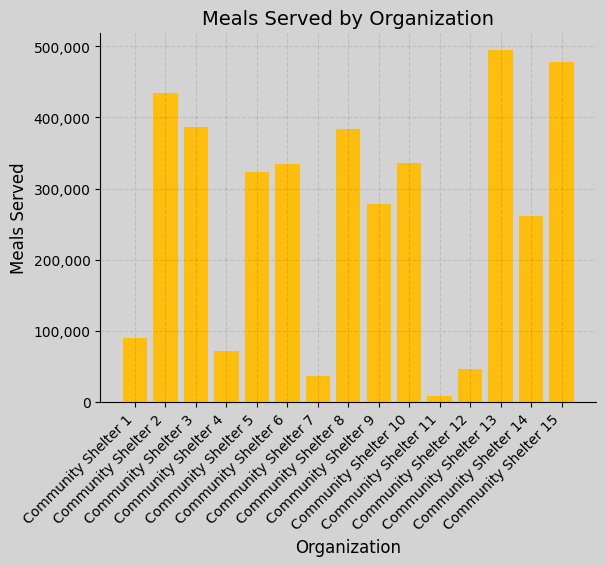

In [8]:
plt.bar(df["Organization"], df["Meals_Served"])
plt.xlabel("Organization")
plt.ylabel("Meals Served")
plt.title("Meals Served by Organization")
plt.xticks(rotation=45, ha='right') 
apply_formatter()
plt.show()

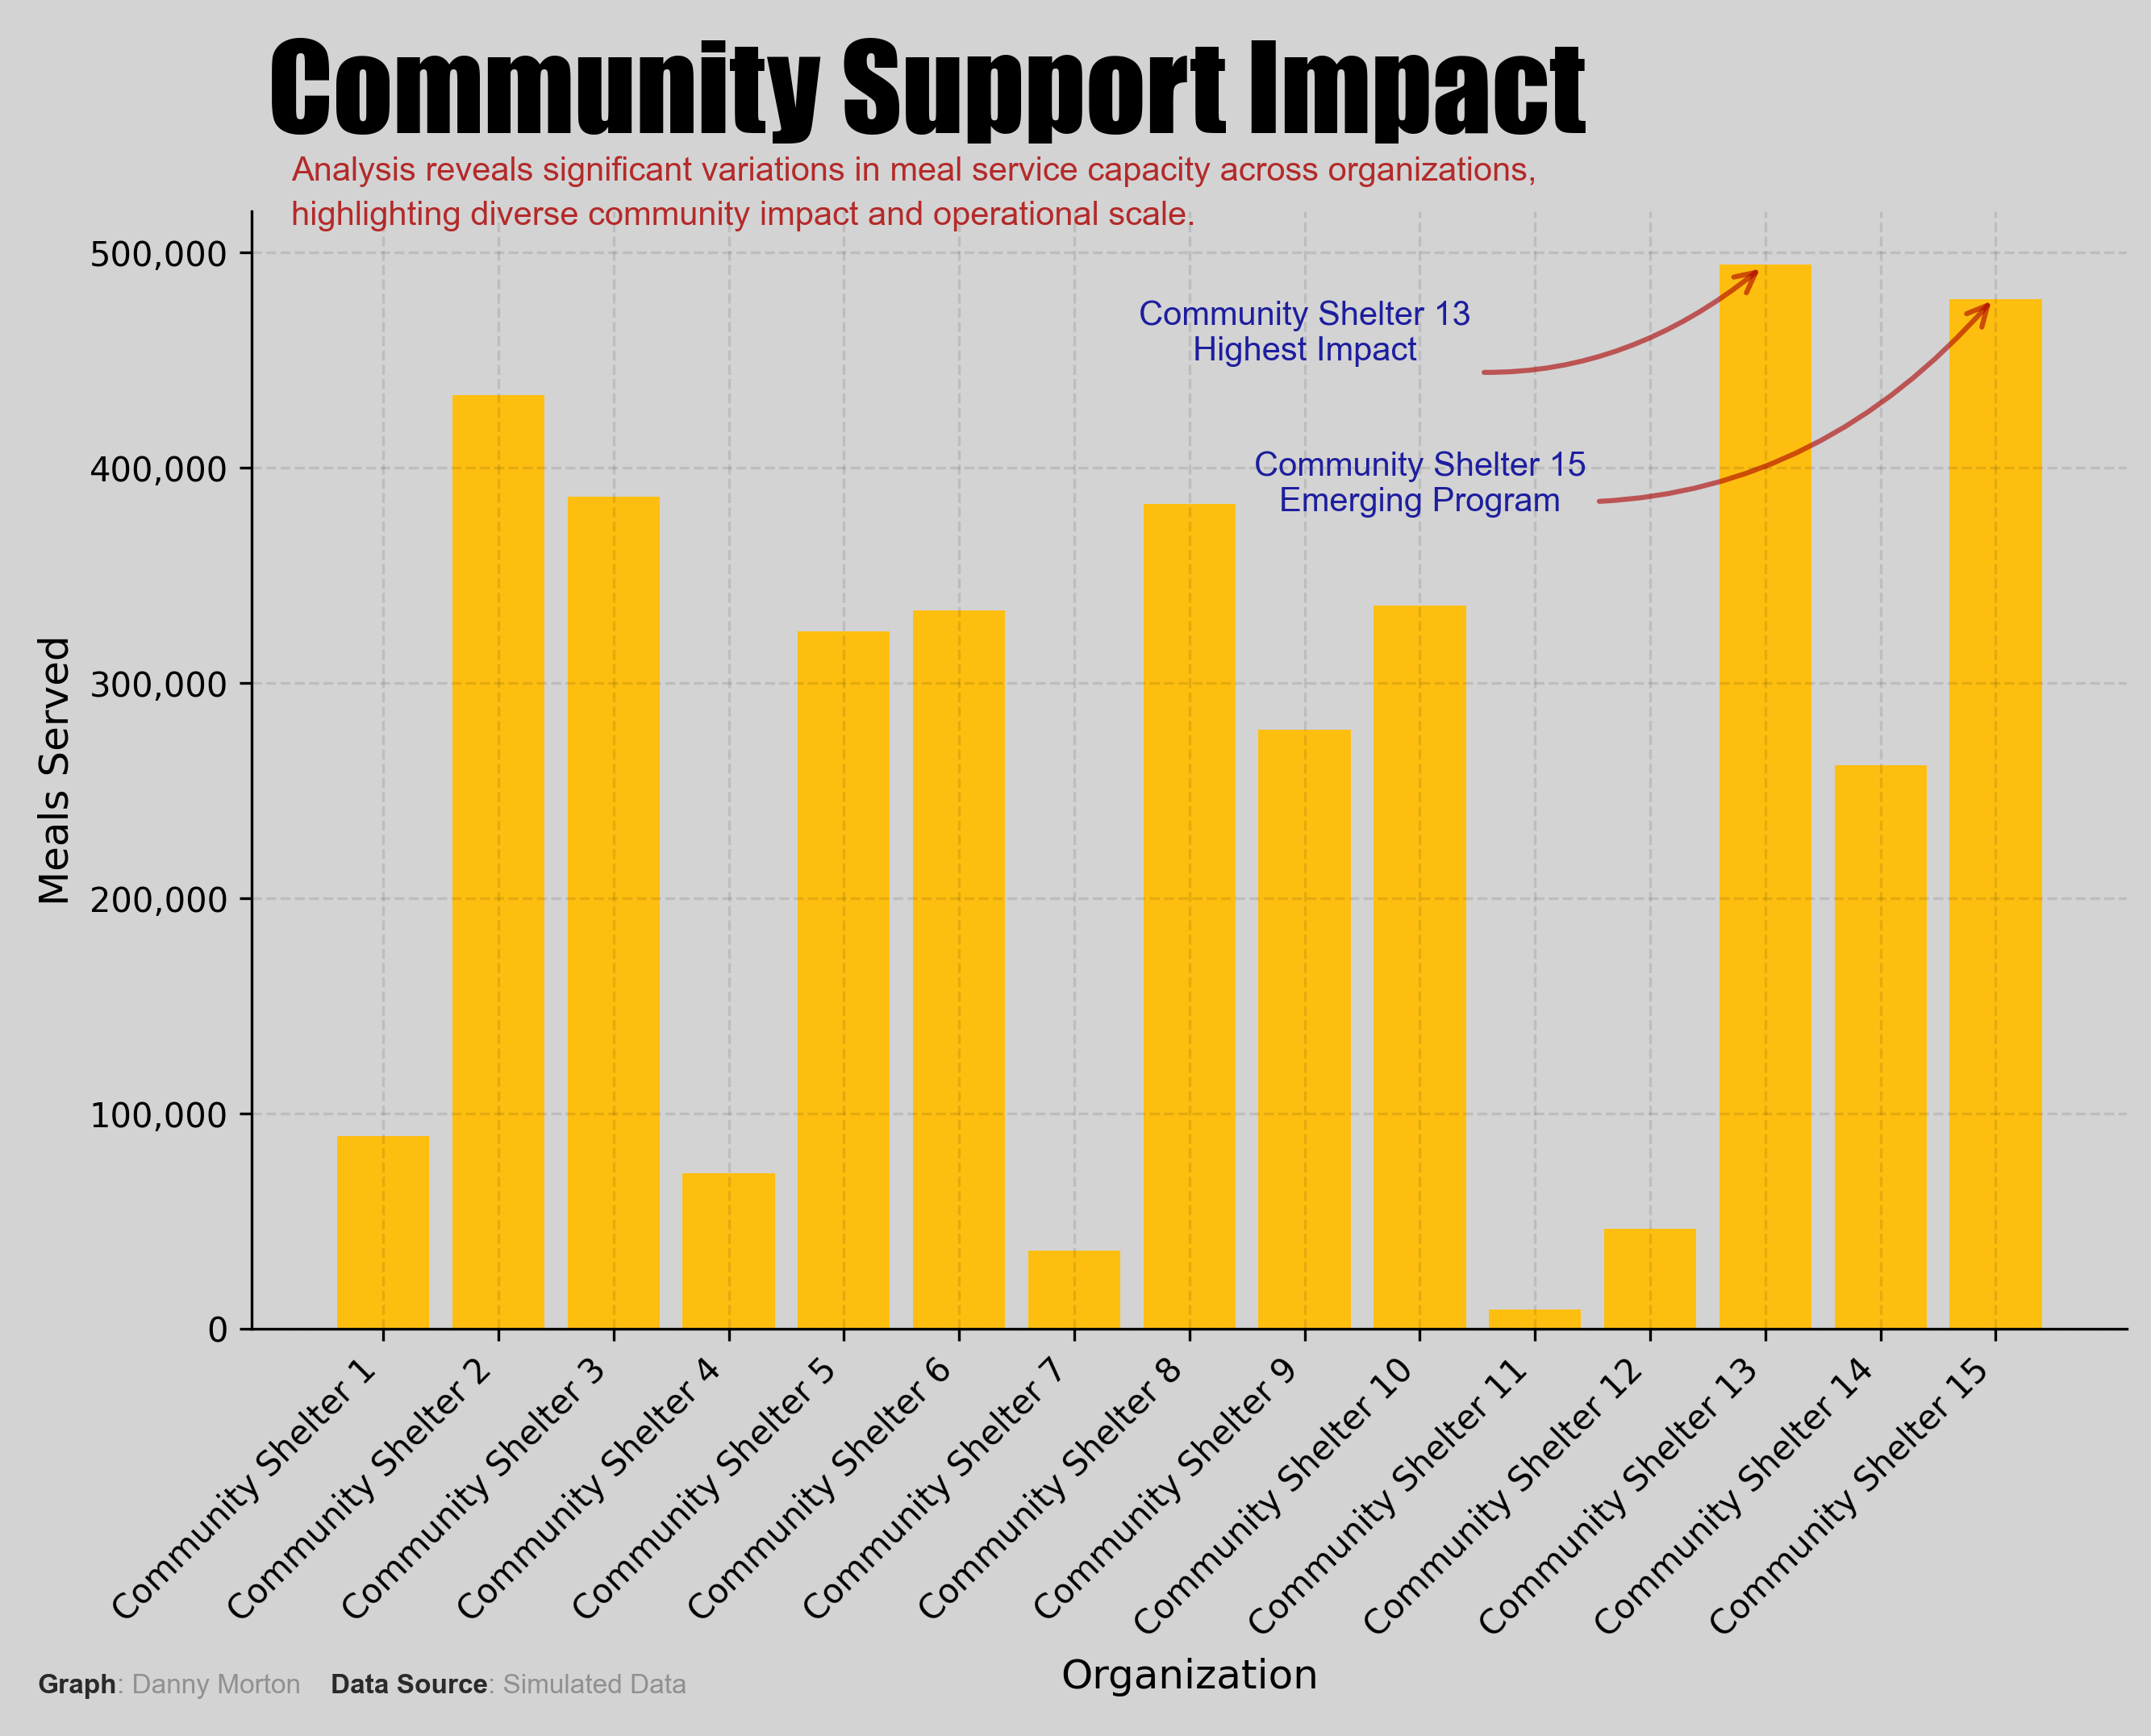

In [9]:
# Set figure size and dpi
plt.figure(figsize=(10, 6), dpi=300)
ax = plt.gca()

# Plot type
plt.bar(df["Organization"], df["Meals_Served"])

# Labels
plt.xlabel("Organization")
plt.ylabel("Meals Served")
plt.xticks(rotation=45, ha='right')

# Title (added space for larger figure)
s = "Community Support Impact"
ax_text(x=-1, y=600000, s=s, fontfamily='impact', size=35, ha="left")

# Additional subtitle
s = "Analysis reveals significant variations in meal service capacity across organizations,\n" \
    "highlighting diverse community impact and operational scale."
ax_text(x=-0.8, y=545000, s=s, fontfamily='arial', size=10, ha="left", color="#AD0000", alpha=0.8)

# Annotation arrow for Shelter 13
ax.annotate(
    "Community Shelter 13\nHighest Impact",
    xy=(12, max(df["Meals_Served"])),
    xytext=(8, 450000),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

# Annotation arrow for Shelter 15
ax.annotate(
    "Community Shelter 15\nEmerging Program",
    xy=(14, 479872),
    xytext=(9, 380000),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

# Caption
s = "<Graph>: Danny Morton    <Data Source>: Simulated Data"
ax_text(
    x=-3,
    y=-160000,
    s=s,
    fontfamily='Arial',
    size=8,
    color='grey',
    ha="left",
    alpha=0.8,
    highlight_textprops=[
        {"weight": "bold", "color": "black"},
        {"weight": "bold", "color": "black"}
    ]
)

# Format axes
apply_formatter()

plt.show()

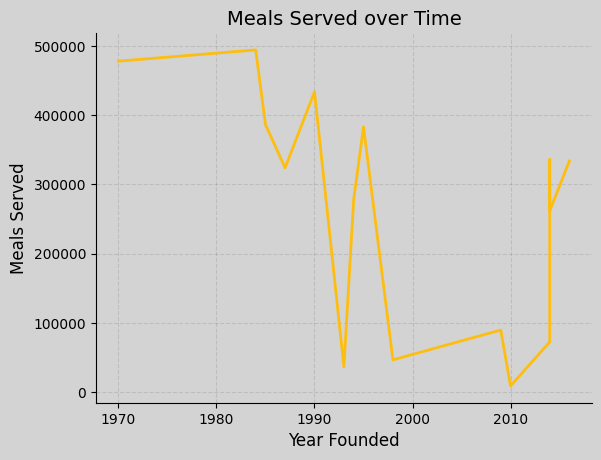

In [10]:
df_sorted = df.sort_values("Year_Founded")

plt.plot(df_sorted["Year_Founded"], df_sorted["Meals_Served"])
plt.xlabel("Year Founded")
plt.ylabel("Meals Served")
plt.title("Meals Served over Time")
plt.show()

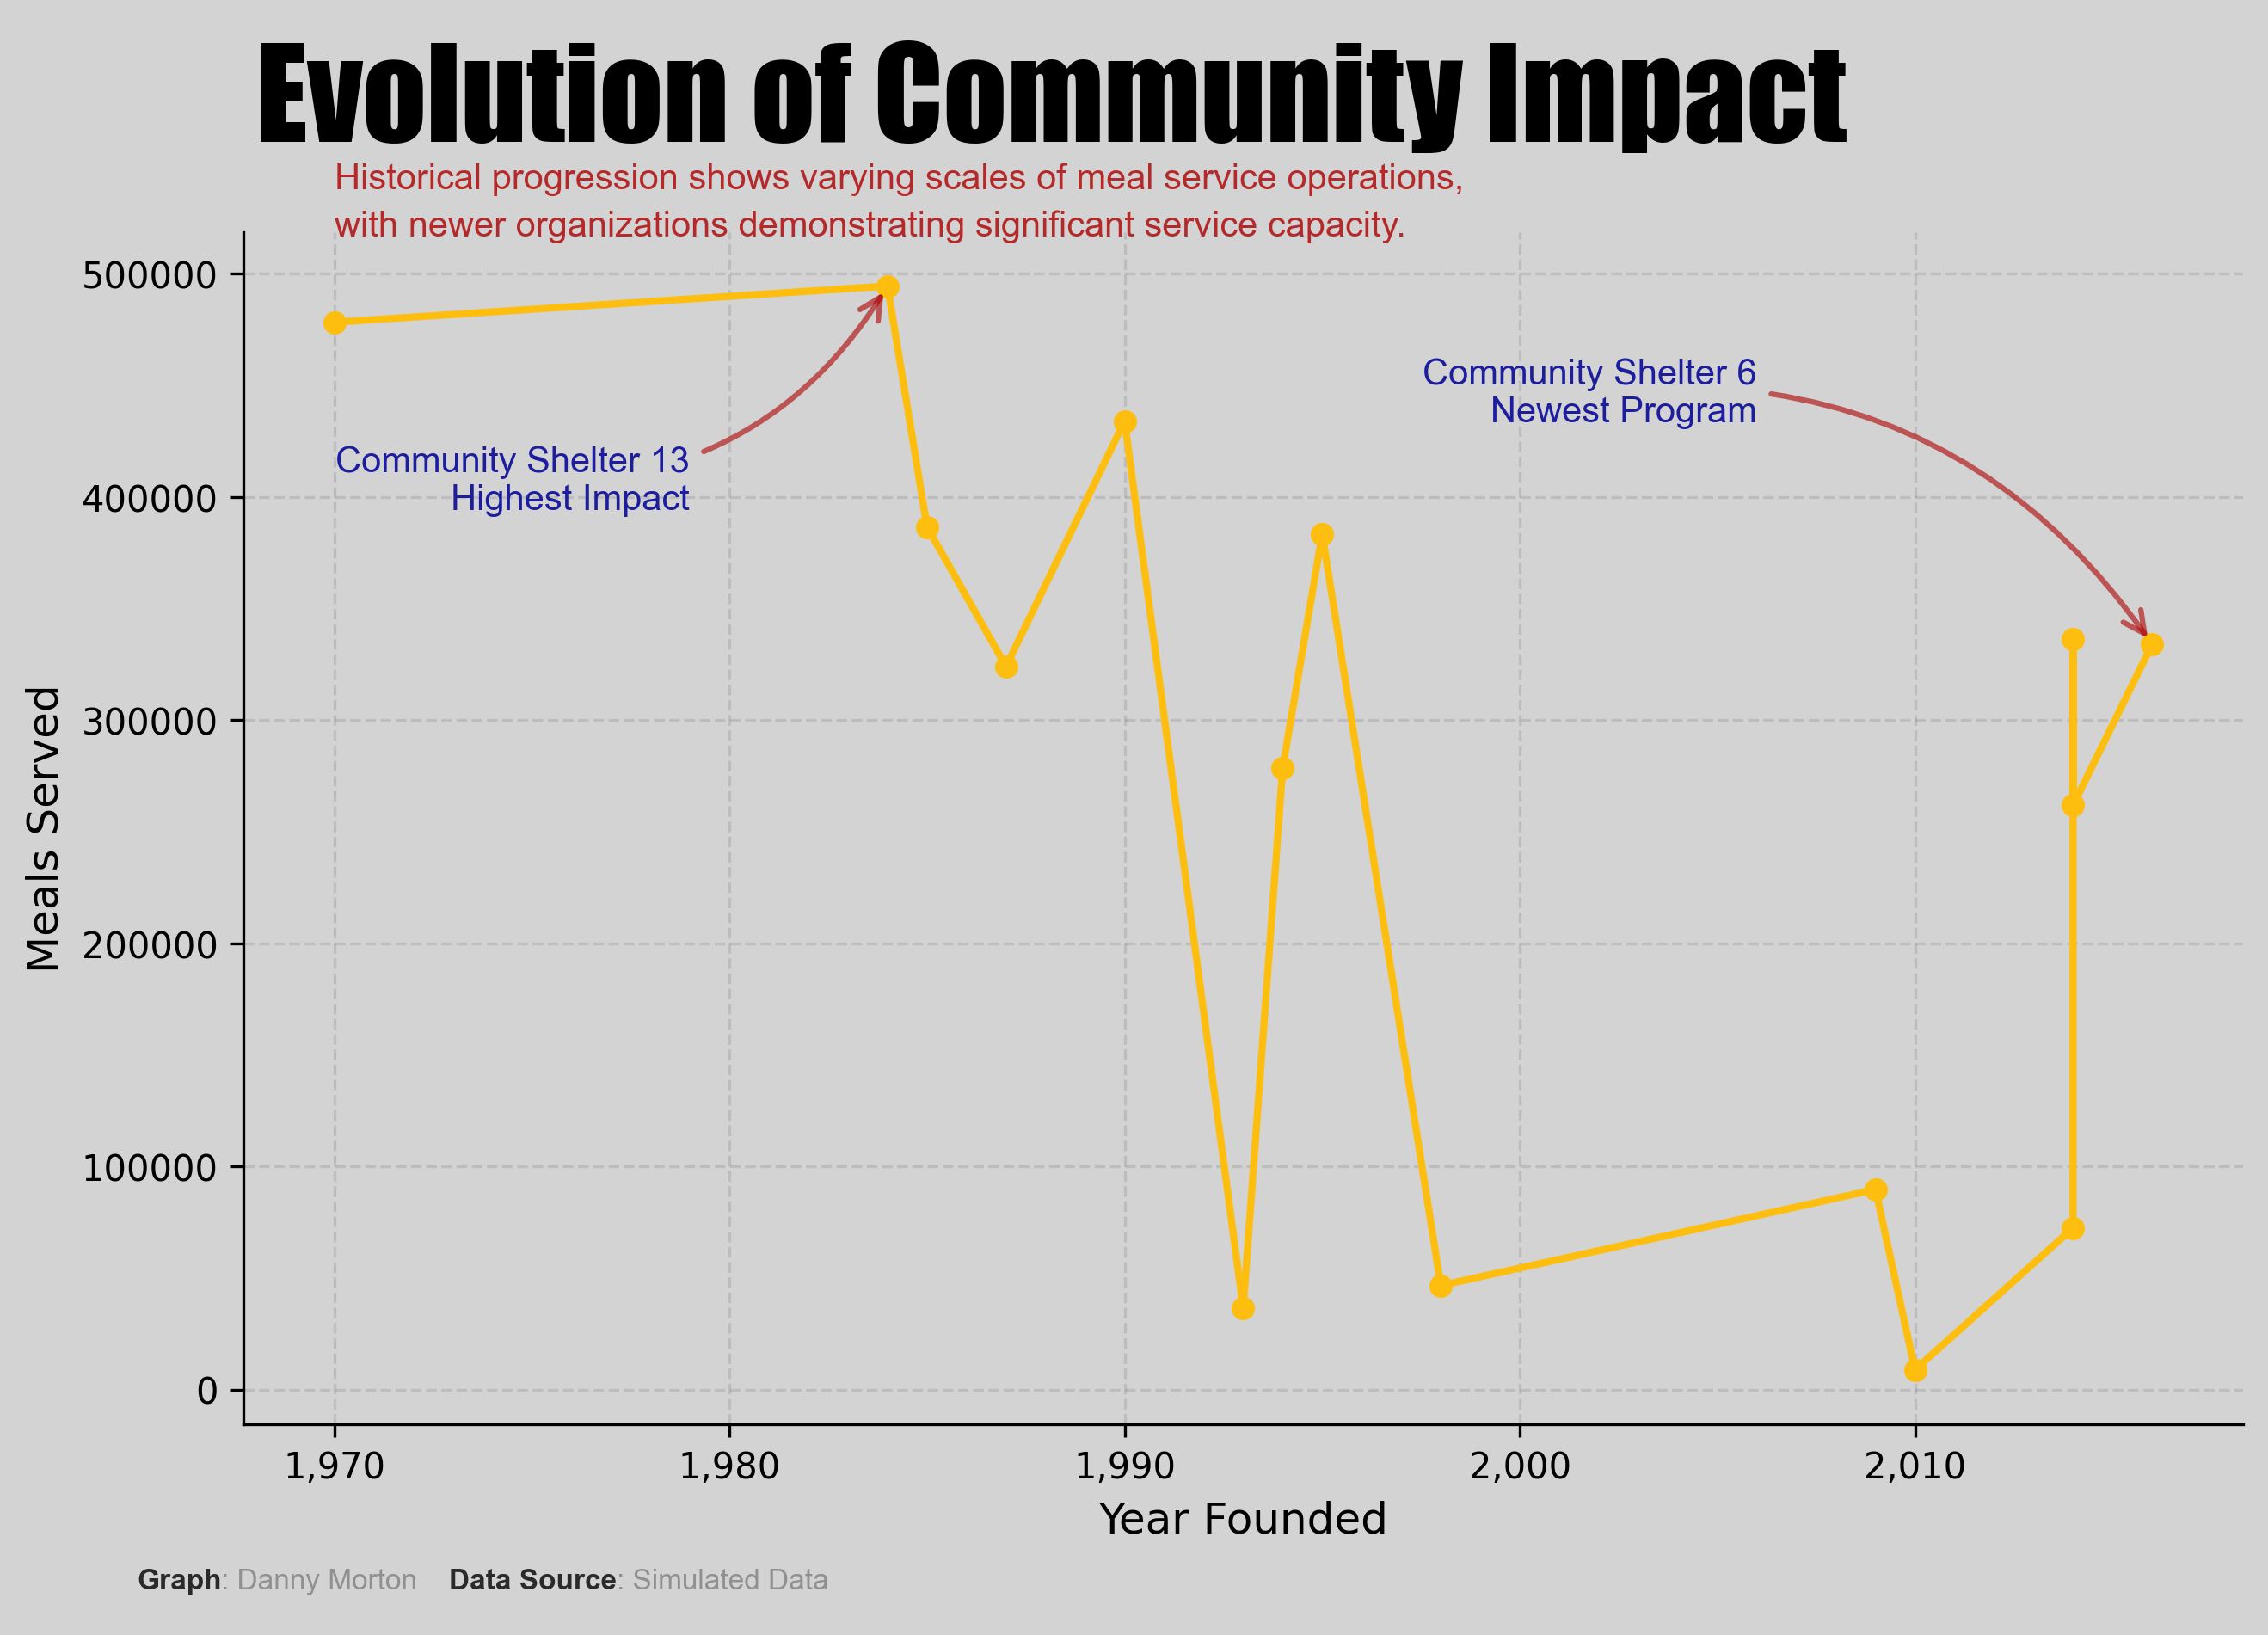

In [11]:
# Sort data by year
df_sorted = df.sort_values("Year_Founded")

# Set figure size and dpi
plt.figure(figsize=(10, 6), dpi=300)
ax = plt.gca()

# Plot type
plt.plot(df_sorted["Year_Founded"], df_sorted["Meals_Served"], marker='o')

# Labels
plt.xlabel("Year Founded")
plt.ylabel("Meals Served")

# Title
s = "Evolution of Community Impact"
ax_text(x=1968, y=605000, s=s, fontfamily='impact', size=35, ha="left")

# Additional subtitle
s = "Historical progression shows varying scales of meal service operations,\n" \
    "with newer organizations demonstrating significant service capacity."
ax_text(x=1970, y=550000, s=s, fontfamily='arial', size=10, ha="left", color="#AD0000", alpha=0.8)

# Find interesting points for annotation
newest_org = df_sorted.iloc[-1]
highest_meals = df_sorted.loc[df_sorted["Meals_Served"].idxmax()]

# Annotation arrow for newest organization
ax.annotate(
    f"{newest_org['Organization']}\nNewest Program",
    xy=(newest_org["Year_Founded"], newest_org["Meals_Served"]),
    xytext=(newest_org["Year_Founded"]-10, newest_org["Meals_Served"]+100000),
    ha="right",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=-0.3",
        alpha=0.6,
    )
)

# Annotation arrow for highest meals served
ax.annotate(
    f"{highest_meals['Organization']}\nHighest Impact",
    xy=(highest_meals["Year_Founded"], highest_meals["Meals_Served"]),
    xytext=(highest_meals["Year_Founded"]-5, highest_meals["Meals_Served"]-100000),
    ha="right",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

# Caption
s = "<Graph>: Danny Morton    <Data Source>: Simulated Data"
ax_text(
    x=1965,
    y=-80000,
    s=s,
    fontfamily='Arial',
    size=8,
    color='grey',
    ha="left",
    alpha=0.8,
    highlight_textprops=[
        {"weight": "bold", "color": "black"},
        {"weight": "bold", "color": "black"}
    ]
)

# Format axes
apply_formatter()

plt.show()

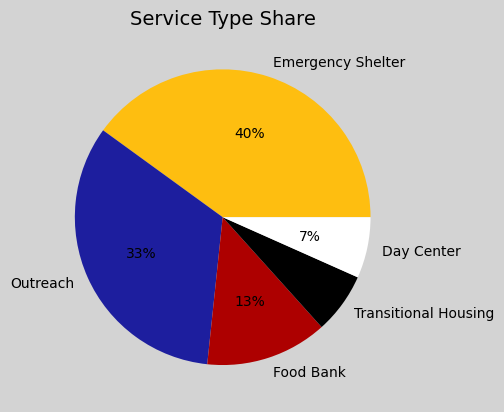

In [12]:
service_counts = df["Service_Type"].value_counts()

plt.pie(service_counts, labels=service_counts.index, autopct="%1.0f%%")
plt.title("Service Type Share")
apply_formatter()
plt.show()

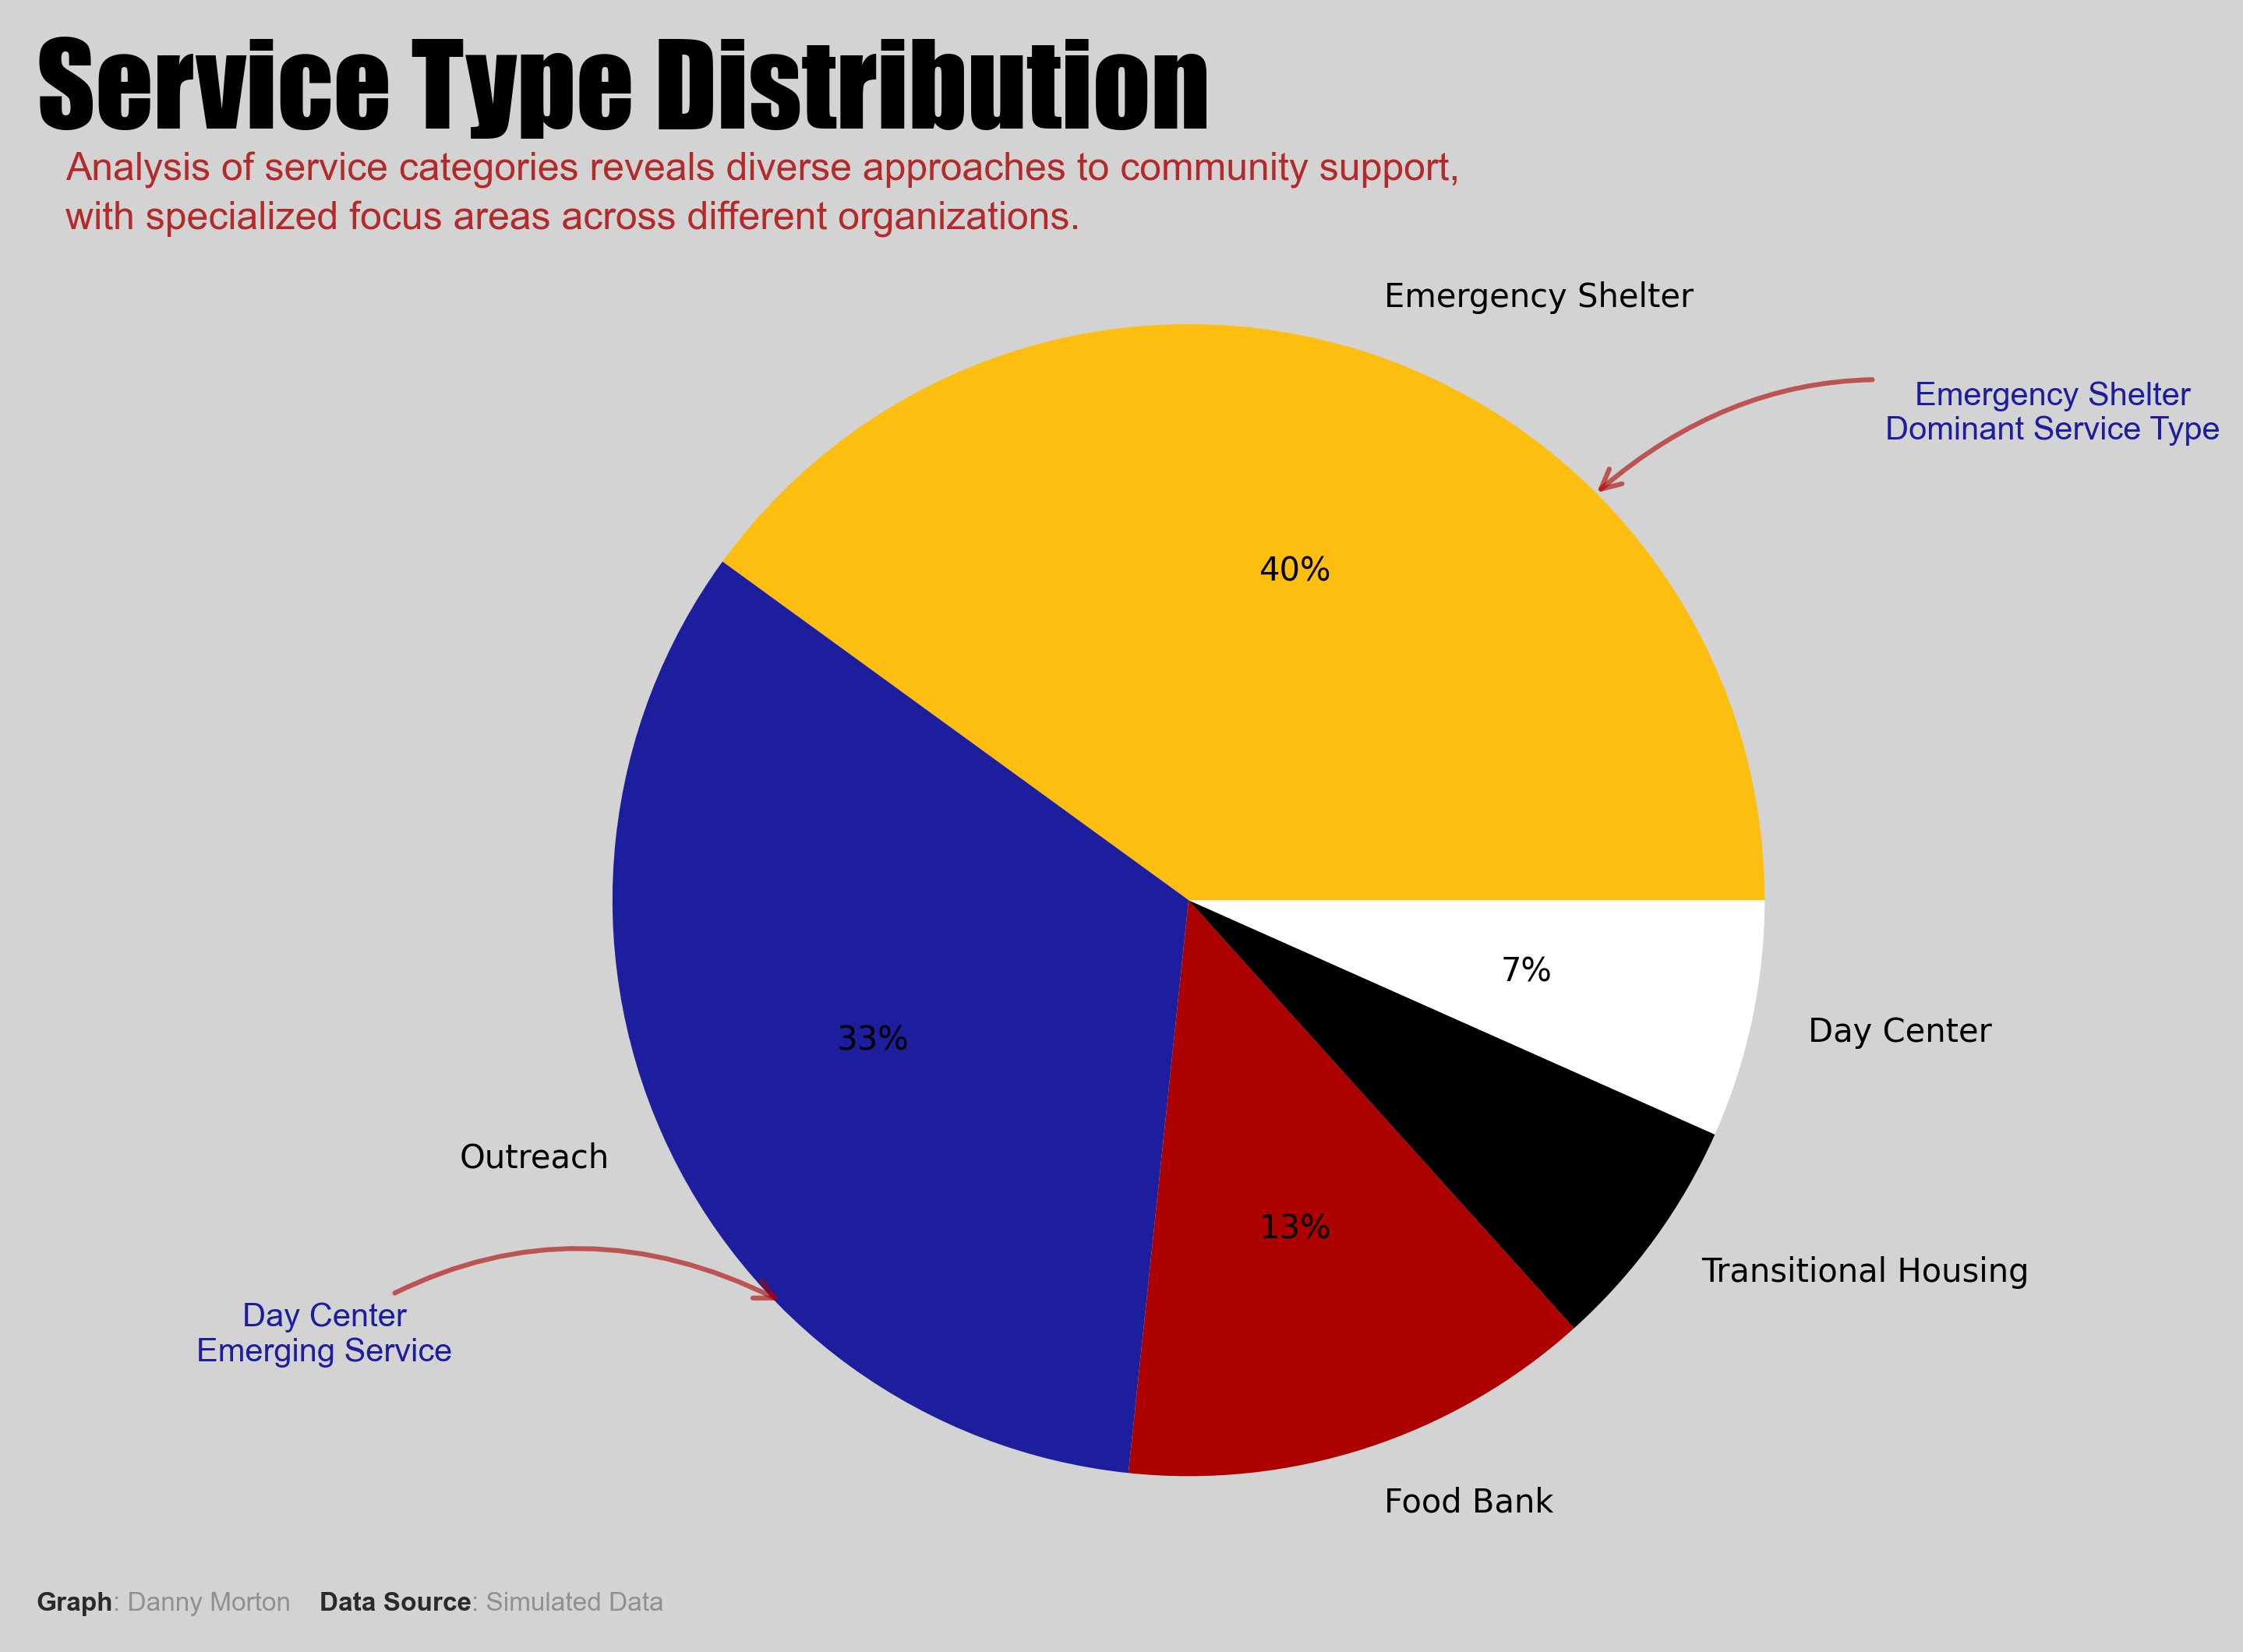

In [13]:
# Calculate service type distribution
service_counts = df["Service_Type"].value_counts()

# Set figure size and dpi
plt.figure(figsize=(10, 8), dpi=300)
ax = plt.gca()

# Create pie chart with custom colors
colors = ['#FEBE10', '#1D1E9E', '#AD0000', '#000000', '#FFFFFF']
plt.pie(service_counts, labels=service_counts.index, autopct="%1.0f%%", colors=colors)

# Title
s = "Service Type Distribution"
ax_text(x=-2, y=1.5, s=s, fontfamily='impact', size=35, ha="left")

# Additional subtitle
s = "Analysis of service categories reveals diverse approaches to community support,\n" \
    "with specialized focus areas across different organizations."
ax_text(x=-1.95, y=1.3, s=s, fontfamily='arial', size=12, ha="left", color="#AD0000", alpha=0.8)

# Find the largest and smallest segments for annotation
largest_service = service_counts.index[0]
smallest_service = service_counts.index[-1]

# Calculate angles for annotation placement
def get_angle(pct):
    return pct * 360 / 100.0

total = sum(service_counts)
largest_pct = service_counts[largest_service] / total * 100
smallest_pct = service_counts[smallest_service] / total * 100

# Annotation for largest segment
ax.annotate(
    f"{largest_service}\nDominant Service Type",
    xy=(0.7, 0.7),  # Approximate position
    xytext=(1.5, 0.8),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=0.3",
        alpha=0.6,
    )
)

# Annotation for smallest segment
ax.annotate(
    f"{smallest_service}\nEmerging Service",
    xy=(-0.7, -0.7),  # Approximate position
    xytext=(-1.5, -0.8),
    ha="center",
    fontsize=10,
    fontfamily='Arial',
    color="#1D1E9E",
    arrowprops=dict(
        arrowstyle="->",
        color="#AD0000",
        lw=1.5,
        mutation_scale=15,
        connectionstyle="arc3,rad=-0.3",
        alpha=0.6,
    )
)

# Caption
s = "<Graph>: Danny Morton    <Data Source>: Simulated Data"
ax_text(
    x=-2,
    y=-1.2,
    s=s,
    fontfamily='Arial',
    size=8,
    color='grey',
    ha="left",
    alpha=0.8,
    highlight_textprops=[
        {"weight": "bold", "color": "black"},
        {"weight": "bold", "color": "black"}
    ]
)

plt.show()

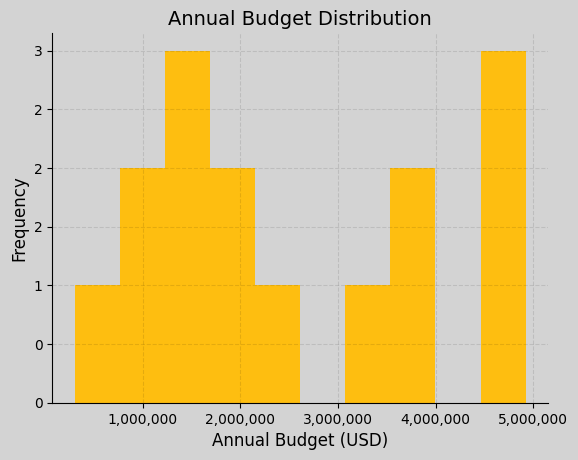

In [14]:
plt.hist(df["Annual_Budget_USD"], bins=10)
plt.xlabel("Annual Budget (USD)")
plt.ylabel("Frequency")
plt.title("Annual Budget Distribution")
apply_formatter()
plt.show()

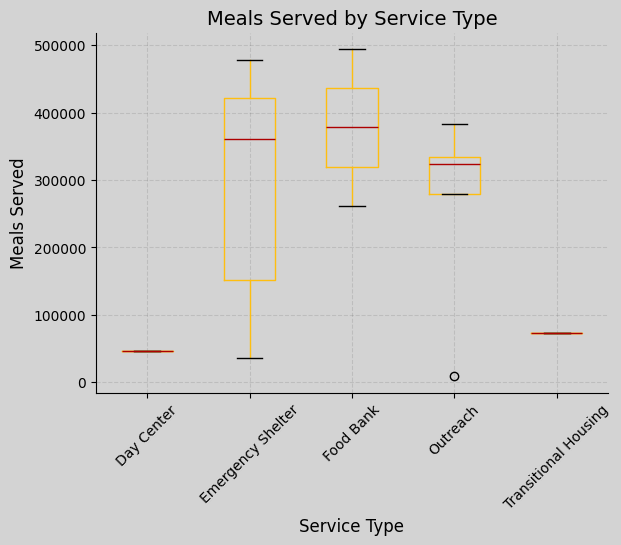

In [15]:
df.boxplot(column="Meals_Served", by="Service_Type", rot=45)
plt.title("Meals Served by Service Type")
plt.suptitle("")
plt.xlabel("Service Type")
plt.ylabel("Meals Served")
apply_formatter()
plt.show()

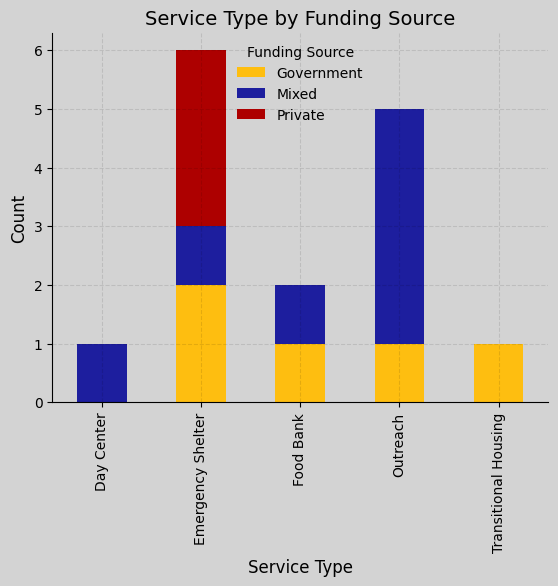

In [16]:
cross_tab = pd.crosstab(df["Service_Type"], df["Funding_Source"])

cross_tab.plot(kind="bar", stacked=True)
plt.xlabel("Service Type")
plt.ylabel("Count")
plt.title("Service Type by Funding Source")
plt.legend(title="Funding Source")
plt.show()

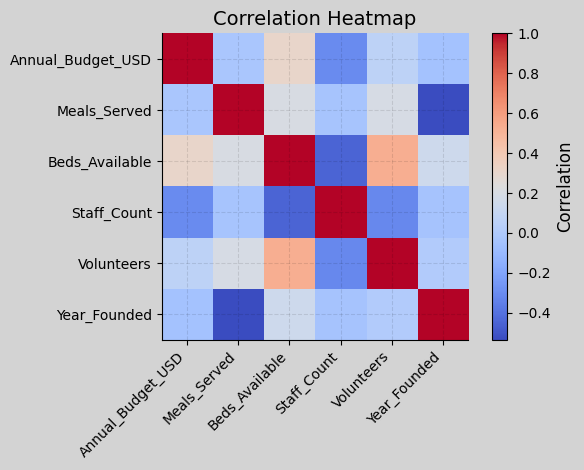

In [17]:
corr = df.select_dtypes("number").corr()
plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()